Q1. What is hierarchical clustering, and how is it different from other clustering techniques?

Q2. What are the two main types of hierarchical clustering algorithms? Describe each in brief.

Q3. How do you determine the distance between two clusters in hierarchical clustering, and what are the common distance metrics used?

Q4. How do you determine the optimal number of clusters in hierarchical clustering, and what are some common methods used for this purpose?

Q5. What are dendrograms in hierarchical clustering, and how are they useful in analyzing the results?

In [ ]:
Lets see a dendogram practically

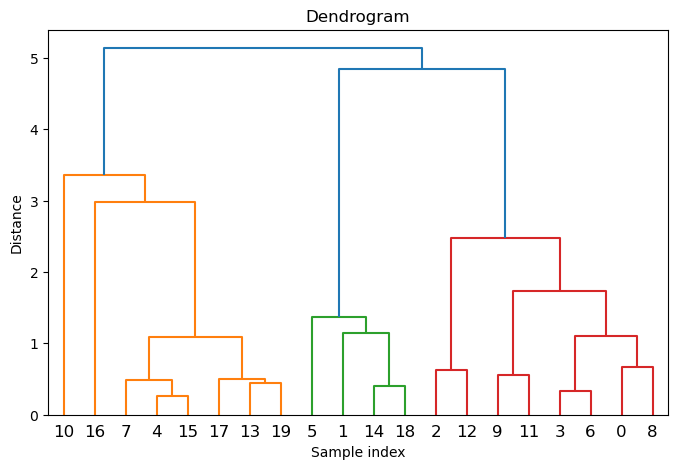

In [2]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Sample data
np.random.seed(0)
data = np.random.randn(20, 2)

# Perform hierarchical clustering
Z = linkage(data, method='ward')

# dendrogram
plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

Q6. Can hierarchical clustering be used for both numerical and categorical data? If yes, how are the distance metrics different for each type of data?

Q7. How can you use hierarchical clustering to identify outliers or anomalies in your data?

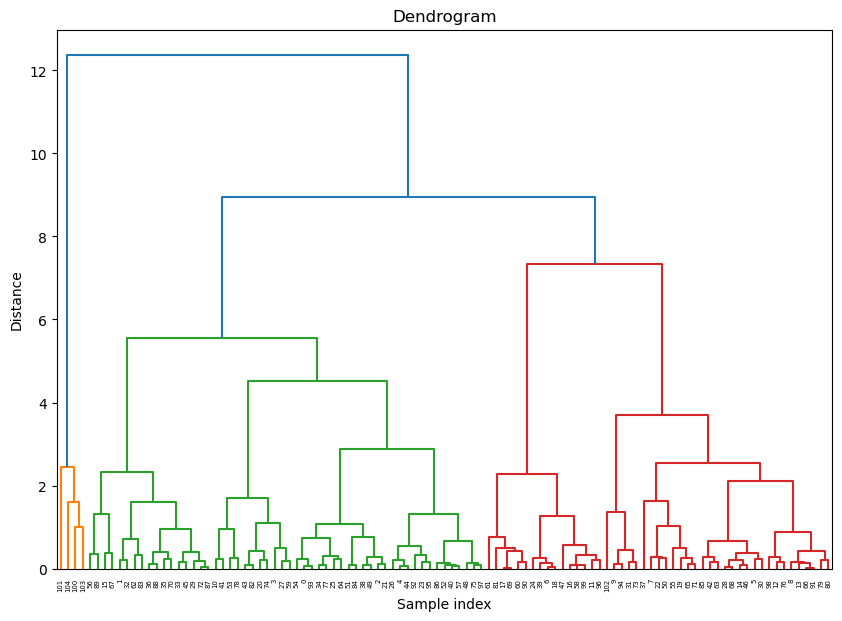

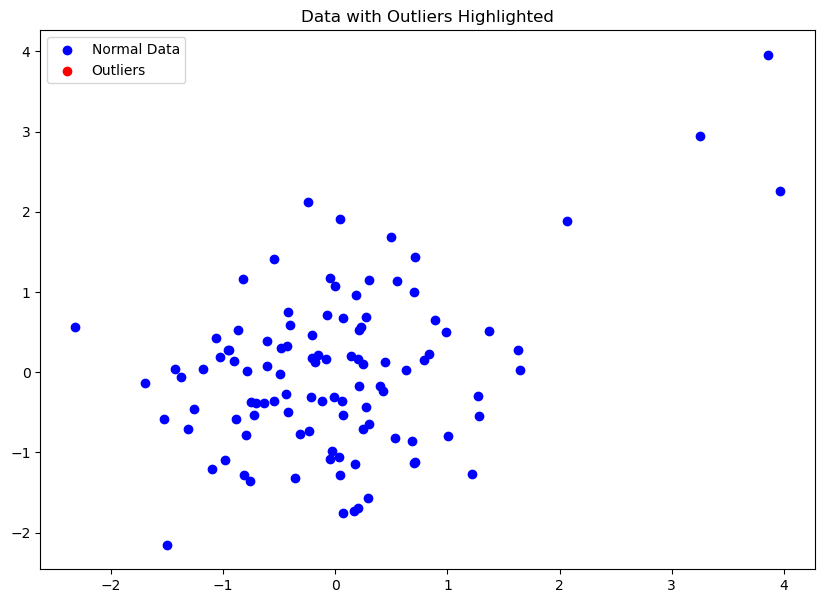

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Generate sample data
np.random.seed(42)
data = np.random.randn(100, 2)  # Normal data
outliers = np.random.uniform(low=-6, high=6, size=(5, 2))  # Outlier data
data_with_outliers = np.vstack([data, outliers])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_with_outliers)

# Perform hierarchical clustering
Z = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Decide on a cutoff and form clusters
threshold = 3.5  # This threshold is chosen based on the dendrogram
clusters = fcluster(Z, threshold, criterion='distance')

# Identify potential outliers
cluster_sizes = pd.Series(clusters).value_counts()
potential_outliers = np.where(np.isin(clusters, cluster_sizes[cluster_sizes == 1].index))[0]

# Visualize the data with outliers highlighted
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c='blue', label='Normal Data')
plt.scatter(data_scaled[potential_outliers, 0], data_scaled[potential_outliers, 1], c='red', label='Outliers')
plt.legend()
plt.title('Data with Outliers Highlighted')
plt.show()